In [241]:
import pandas as pd
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB

In [240]:
#  Import the dataset and explore it
profiles = pd.read_csv('profiles.csv')
profiles = profiles.dropna()
profiles

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
19,33,athletic,mostly anything,socially,never,graduated from masters program,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,catholicism but not too serious about it,m,pisces and it&rsquo;s fun to think about,no,english (fluently),single
22,30,fit,mostly anything,socially,never,graduated from college/university,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and somewhat serious about it,m,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",single
94,29,fit,mostly anything,socially,sometimes,graduated from college/university,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,...,"san francisco, california",doesn&rsquo;t want kids,straight,likes dogs and likes cats,agnosticism and very serious about it,m,libra,no,english (fluently),single
98,31,curvy,anything,socially,sometimes,graduated from masters program,one day i will mod r/hotchickswithspreadsheets...,"presently, holyshitwhatamidoinghere and the sp...","algebra, alliteration, big spoon and little sp...",i look a lot like that chick you banged your f...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs,atheism,f,pisces,no,english (fluently),single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,a little extra,mostly other,not at all,never,graduated from two-year college,hi! about me.... well i currently work from ho...,"besides raising my two children, i work from h...","creative writing, dancing, gardening, listenin...","people usually comment on my long hair, and i'...",...,"san bruno, california",has kids,straight,likes cats,other and very serious about it,f,cancer,no,english (fluently),single
59907,24,skinny,anything,socially,sometimes,graduated from college/university,"my name is peter. i'm an oakland native, and i...","restaurant work downtown, (not enough) freelan...","remaining calm, selecting music, baking pie, b...",i talk and smile out the side of my mouth. you...,...,"oakland, california",doesn&rsquo;t have kids,straight,likes dogs,atheism and somewhat serious about it,m,taurus and it&rsquo;s fun to think about,sometimes,"english (fluently), spanish (okay)",single
59913,29,full figured,mostly anything,socially,never,graduated from college/university,i have lived in sf off and on for 7.5 years no...,"living it. no matter how much i try, i still f...","making people laugh, pairing flip flops with a...",my smile or eyes.,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism and laughing about it,f,libra but it doesn&rsquo;t matter,no,"english (fluently), spanish (poorly)",single
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing sch

In [228]:
#  Condense 'pet' categories down into 'likes' or 'dislikes' cats
profiles.loc[profiles['pets'].str.contains('likes cats') | profiles['pets'].str.contains('has cats'), 'cats'] = 'likes'
profiles.loc[~(profiles['pets'].str.contains('likes cats') | profiles['pets'].str.contains('has cats')), 'cats'] = 'dislikes'

#  Encode categories into numerical values
category_mapping = {
    'likes': 0,
    'dislikes': 1
}
profiles['label'] = profiles['cats'].apply(lambda x: category_mapping[x])
profiles['text'] = profiles['essay0']

In [229]:
from sklearn.model_selection import train_test_split

#  Assign text to be vectorized and labels to X and y variables respectively
X = profiles['text']
y = profiles['label']

#  Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#  Create vectorizer and fit_transform both X sets of data
vectorizer = TfidfVectorizer(max_features=9960)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.fit_transform(X_test)

#  Create Naive Bayes classifier and fit the training data
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [233]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#  Predict y-values for the test set and obtain an accuracy score for the training and test data
y_pred = classifier.predict(X_test_vect)
print(accuracy_score(classifier.predict(X_train_vect), y_train))
print(accuracy_score(y_pred, y_test))

0.7821276595744681
0.3276643990929705


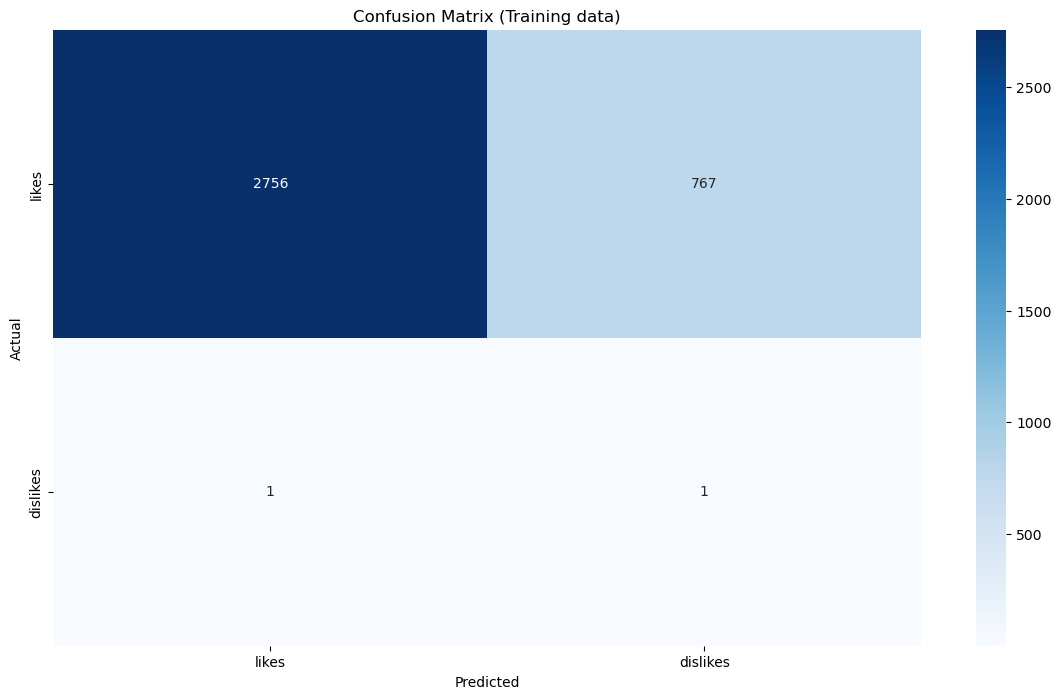

In [238]:
#  Visualise results for training set.
import matplotlib.pyplot as plt
import seaborn as sns

#  Generate confusion matrix
cm = confusion_matrix(classifier.predict(X_train_vect), y_train)

#  Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = category_mapping.keys(), yticklabels = category_mapping.keys()) 

#  Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training data)')

#  Show plot
plt.show()

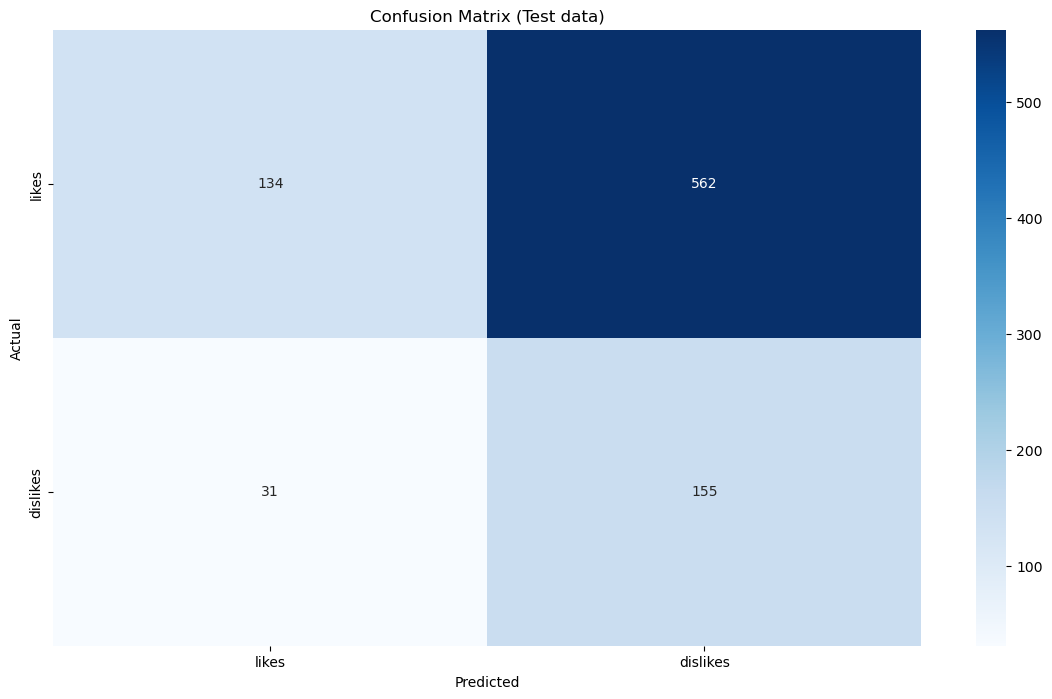

In [239]:
#  Visualise results for test set.
import matplotlib.pyplot as plt
import seaborn as sns

#  Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

#  Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = category_mapping.keys(), yticklabels = category_mapping.keys()) 

#  Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test data)')

#  Show plot
plt.show()